In [33]:
import os, warnings
from tensorflow.keras.utils import image_dataset_from_directory
import tensorflow as tf

# Project 2 - Veggie Classification

For this assignment you'll need to classify some images of vegetables. 

## Parts

Please do two separate classifications:
<ol>
<li> First, create a model from scratch. 
<li> Use transfer learning to use a pretrained model of your choice, adapted to this data. 
</ol>

There won't be an explicit evaluation of accuracy, but you should take some steps to make each model as accurate as you reasonably can, any tuning option is fair game. Along with that, please structure it into a notebook that is well structured and clear that explains what you did and found. Think about:
<ul>
<li> Sections and headings. 
<li> A description of the approach taken (e.g. what did you do to determine size, tune, evaluate, etc...)
<li> Visualization of some important things such as a confusion matrix and maybe some images. 
<li> Results, mainly focused on the scoring of the test data. 
</ul>

The descriptions and explainations should highlight the choices you made and why you made them. Figure up to about a page or so worth of text total, explain what happened but don't write an essay. 

## Deliverables

Please sumbmit a link to your github, where everyhting is fully run with all the outputs showing on the page. As well, in the notebook please add some kind of switch controlled by a variable that will control if the notebook runs to train the model or to load the model in from weights - so I can download it and click run all, it will load the saved weights, and predict.

### Dataset

The code in the start of this notebook will download and unzip the dataset, and there is also a simple example of creating datasets. You can change the dataset bit to use a different approach if you'd like. The data is already split into train, validation, and test sets. Please treat the separate test set as the final test set, and don't use it for any training or validation. Each folder name is its own label.

### Evaluation

Marking will be based on the following:
<ul>
<li> Models are cretaed, tuned, and effective at classifying the data: 40%
<li> Descriptions and explanations of the approach taken: 20%
<li> Code is well structured and clear: 20%
</ul>

Overall the marking is pretty simple and direct, walk through the process of predicting the veggies, explain what you did, and show the results. If you do that, it'll get a good mark.

### Tips

Some hints that may be helpful to keep in mind:
<ul>
<li> The data is pretty large, so you'll want to use datasets rather than load everything into memory. The Keras docs have a few examples of different ways to load image data, our examples showed image generators and the image from directory datasets.  
<li> Be careful of batch size, you may hit the colab limits. 
<li> You'll want to use checkpoints so you can let it train and pick up where you left off.
<li> When developing, using a smaller dataset sample is a good idea. These weights could also be saved and loaded to jump start training on the full data. 
<li>

### Download and Unzip Data

In [15]:
#!pip install wget

In [16]:
'''
def bar_custom(current, total, width=80):
    print("Downloading: %d%% [%d / %d] bytes" % (current / total * 100, current, total))
import wget
import zipfile
zip_name = "train.zip"

url = "https://jrssbcrsefilesnait.blob.core.windows.net/3950data1/vegetable_image_dataset.zip"

if not os.path.exists(zip_name):
    wget.download(url, zip_name, bar=bar_custom)

with zipfile.ZipFile(zip_name, 'r') as zip_ref:
    zip_ref.extractall()
'''

'\ndef bar_custom(current, total, width=80):\n    print("Downloading: %d%% [%d / %d] bytes" % (current / total * 100, current, total))\nimport wget\nimport zipfile\nzip_name = "train.zip"\n\nurl = "https://jrssbcrsefilesnait.blob.core.windows.net/3950data1/vegetable_image_dataset.zip"\n\nif not os.path.exists(zip_name):\n    wget.download(url, zip_name, bar=bar_custom)\n\nwith zipfile.ZipFile(zip_name, \'r\') as zip_ref:\n    zip_ref.extractall()\n'

In [17]:
'''
import os
import wget
import zipfile

dataset_dir = "vegetable_dataset"
if not os.path.exists(dataset_dir):
    os.mkdir(dataset_dir)

zip_name = os.path.join(dataset_dir, "train.zip")
url = "https://jrssbcrsefilesnait.blob.core.windows.net/3950data1/vegetable_image_dataset.zip"

if not os.path.exists(zip_name):
    wget.download(url, zip_name, bar=bar_custom)

with zipfile.ZipFile(zip_name, 'r') as zip_ref:
    zip_ref.extractall(dataset_dir)

'''


'\nimport os\nimport wget\nimport zipfile\n\ndataset_dir = "vegetable_dataset"\nif not os.path.exists(dataset_dir):\n    os.mkdir(dataset_dir)\n\nzip_name = os.path.join(dataset_dir, "train.zip")\nurl = "https://jrssbcrsefilesnait.blob.core.windows.net/3950data1/vegetable_image_dataset.zip"\n\nif not os.path.exists(zip_name):\n    wget.download(url, zip_name, bar=bar_custom)\n\nwith zipfile.ZipFile(zip_name, \'r\') as zip_ref:\n    zip_ref.extractall(dataset_dir)\n\n'

In [44]:

# Generate Datasets - you can change this if desired
# ENSURE FILE PATHS MATCH CORRECTLY
IMAGE_SIZE=(124,124)
train_dir='Vegetable Images/train'
val_dir='Vegetable Images/validation'
batch_size = 16

# Load training data
train_ds = image_dataset_from_directory(
    train_dir,
    label_mode='categorical',
    image_size = IMAGE_SIZE,
    batch_size=batch_size
)

val_ds = image_dataset_from_directory(
    val_dir,
    label_mode='categorical',
    image_size = IMAGE_SIZE,
    batch_size = batch_size,
)


Found 15000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.


## Data Preparation

In [45]:
# Set the control switch variable to control loading of saved weights
load_model_weights = False

# Check if we need to load saved weights or not
if load_model_weights:
    # Load saved weights
    weights_path = 'path/to/saved/weights'
    if os.path.exists(weights_path):
        model.load_weights(weights_path)
        print('Model weights loaded successfully.')
    else:
        print('Error: Could not find the saved weights file.')
else:
    # Train the model
    history = model.fit(train_generator,
                        epochs=5,
                        validation_data=validation_generator,
                        steps_per_epoch=steps_per_epoch)

Epoch 1/5
6/8 [=====================>........] - ETA: 2s - loss: 1.6653 - accuracy: 0.4844

KeyboardInterrupt: 

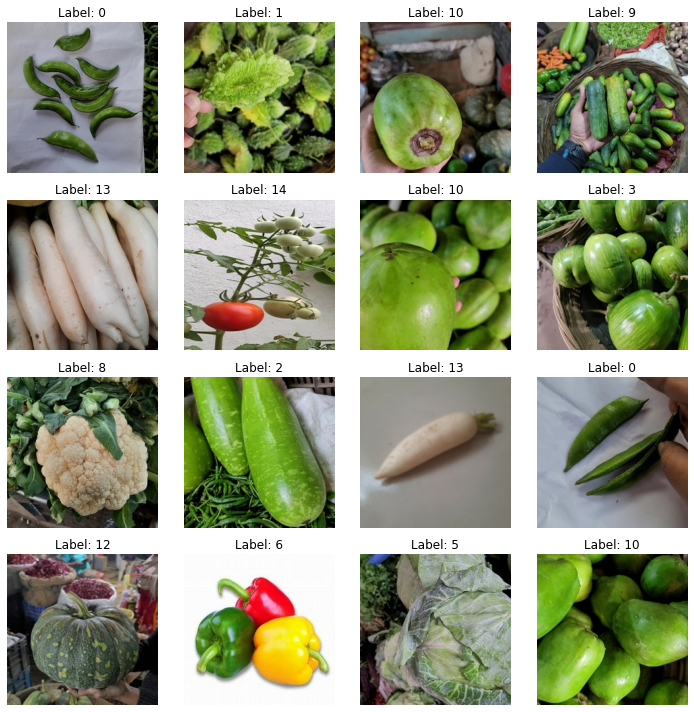

In [19]:
import matplotlib.pyplot as plt

# Get the first batch of images and labels
images, labels = next(iter(train_ds))

# Plot the images
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i].numpy().astype("uint8"))
    ax.set_title(f"Label: {labels[i].numpy().argmax()}")
    ax.axis("off")

plt.tight_layout()
plt.show()

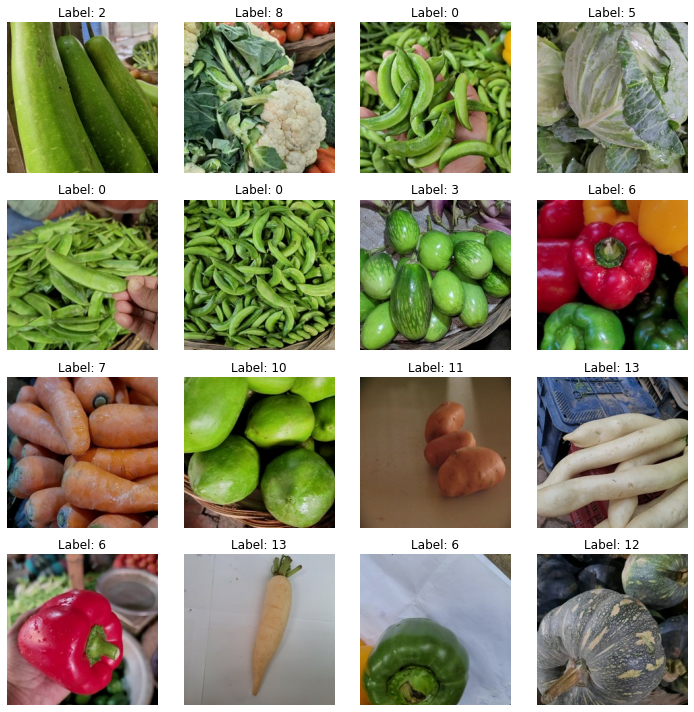

In [20]:
# Get the first batch of images and labels
images, labels = next(iter(val_ds))

# Plot the images
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i].numpy().astype("uint8"))
    ax.set_title(f"Label: {labels[i].numpy().argmax()}")
    ax.axis("off")

plt.tight_layout()
plt.show()

## Custom Model Training

In [21]:
'''
# Define the architecture of the model
model = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(15, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model on the train_ds data
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

# Evaluate the performance of the model on the val_ds data
loss, accuracy = model.evaluate(val_ds)

print(f"Loss: {loss}, Accuracy: {accuracy}")
'''

Epoch 1/10
 51/938 [>.............................] - ETA: 9:55 - loss: 2.5186 - accuracy: 0.1716

KeyboardInterrupt: 

## Transfer Learning Model

In [41]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16

# Set the input shape for the VGG16 model
input_shape = (128, 128, 3)

# Create the base model using the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Define the new model
model = tf.keras.models.Sequential([
  base_model,
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(15, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Create data generators for the train and validation datasets
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

train_generator = train_datagen.flow_from_directory(
    'Vegetable Images/train',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator = train_datagen.flow_from_directory(
    'Vegetable Images/train',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Take only 2% of the training data for training the model
steps_per_epoch = int(0.02 * train_generator.n / train_generator.batch_size)

# Train the model
history = model.fit(train_generator,
                    epochs=20,
                    validation_data=validation_generator,
                    steps_per_epoch=steps_per_epoch)

Found 13500 images belonging to 15 classes.
Found 1500 images belonging to 15 classes.
Epoch 1/5
8/8 [==============================] - 57s 8s/step - loss: 3.2787 - accuracy: 0.1367 - val_loss: 2.1918 - val_accuracy: 0.4073
Epoch 2/5
8/8 [==============================] - 56s 8s/step - loss: 2.2298 - accuracy: 0.2969 - val_loss: 1.9339 - val_accuracy: 0.4613
Epoch 3/5
8/8 [==============================] - 57s 8s/step - loss: 1.9817 - accuracy: 0.3828 - val_loss: 1.6965 - val_accuracy: 0.5100
Epoch 4/5
8/8 [==============================] - 52s 7s/step - loss: 1.8329 - accuracy: 0.4180 - val_loss: 1.3998 - val_accuracy: 0.6653
Epoch 5/5
8/8 [==============================] - 58s 8s/step - loss: 1.5580 - accuracy: 0.5117 - val_loss: 1.2033 - val_accuracy: 0.6633


## Test Best Models and Illustrate Results

In [42]:
test_dir='Vegetable Images/test'
test_ds = image_dataset_from_directory(
    test_dir,
    label_mode='categorical',
    image_size = IMAGE_SIZE,
    batch_size = batch_size,
)

Found 3000 files belonging to 15 classes.


In [43]:

# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_ds)

print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

InvalidArgumentError: Graph execution error:

Detected at node 'sequential_7/dense_14/Relu' defined at (most recent call last):
    File "c:\Users\billg\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\billg\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "c:\Users\billg\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "c:\Users\billg\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "c:\Users\billg\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "c:\Users\billg\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\billg\anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "c:\Users\billg\anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "c:\Users\billg\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\billg\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "c:\Users\billg\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "c:\Users\billg\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 367, in dispatch_shell
      await result
    File "c:\Users\billg\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "c:\Users\billg\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "c:\Users\billg\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\billg\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2863, in run_cell
      result = self._run_cell(
    File "c:\Users\billg\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2909, in _run_cell
      return runner(coro)
    File "c:\Users\billg\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\billg\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3106, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\billg\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3309, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\billg\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\billg\AppData\Local\Temp\ipykernel_13816\898738584.py", line 59, in <cell line: 59>
      history = model.fit(train_generator,
    File "c:\Users\billg\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\billg\anaconda3\lib\site-packages\keras\engine\training.py", line 1729, in fit
      val_logs = self.evaluate(
    File "c:\Users\billg\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\billg\anaconda3\lib\site-packages\keras\engine\training.py", line 2072, in evaluate
      tmp_logs = self.test_function(iterator)
    File "c:\Users\billg\anaconda3\lib\site-packages\keras\engine\training.py", line 1852, in test_function
      return step_function(self, iterator)
    File "c:\Users\billg\anaconda3\lib\site-packages\keras\engine\training.py", line 1836, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\billg\anaconda3\lib\site-packages\keras\engine\training.py", line 1824, in run_step
      outputs = model.test_step(data)
    File "c:\Users\billg\anaconda3\lib\site-packages\keras\engine\training.py", line 1788, in test_step
      y_pred = self(x, training=False)
    File "c:\Users\billg\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\billg\anaconda3\lib\site-packages\keras\engine\training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\billg\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\billg\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\billg\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\billg\anaconda3\lib\site-packages\keras\engine\sequential.py", line 412, in call
      return super().call(inputs, training=training, mask=mask)
    File "c:\Users\billg\anaconda3\lib\site-packages\keras\engine\functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\billg\anaconda3\lib\site-packages\keras\engine\functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\billg\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\billg\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\billg\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\billg\anaconda3\lib\site-packages\keras\layers\core\dense.py", line 255, in call
      outputs = self.activation(outputs)
    File "c:\Users\billg\anaconda3\lib\site-packages\keras\activations.py", line 317, in relu
      return backend.relu(
    File "c:\Users\billg\anaconda3\lib\site-packages\keras\backend.py", line 5396, in relu
      x = tf.nn.relu(x)
Node: 'sequential_7/dense_14/Relu'
Matrix size-incompatible: In[0]: [16,4608], In[1]: [8192,256]
	 [[{{node sequential_7/dense_14/Relu}}]] [Op:__inference_test_function_16361]